In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
filename = 'out.facebook-wosn-wall.txt'
#filename = 'out-Copy1.facebook-wosn-wall.txt'
with open(filename, 'r') as f:
    lines = f.read().splitlines()
MG = nx.read_edgelist(filename, create_using = nx.MultiDiGraph, nodetype = int, data=(('weight', int),("time", int)))
MG.remove_edges_from(nx.selfloop_edges(MG))

In [28]:
#G = nx.DiGraph()
G = nx.Graph()
for u,v,data in MG.edges(data=True):
    w = data['weight'] if 'weight' in data else 1.0
    if G.has_edge(u,v):
        G[u][v]['weight'] += w
    else:
        G.add_edge(u, v, weight=w)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
#nx.draw(G, node_size=50, connectionstyle='arc3, rad = 0.2')
# pos = nx.spring_layout(G)
# plt.figure(figsize=(30,30))
# nx.draw(G, pos, node_color = 'blue', node_size = 100, alpha = 1, edge_color = 'black')
# ax = plt.gca()
# for e in G.edges:
#     ax.annotate("",
#                 xy=pos[e[0]], xycoords='data',
#                 xytext=pos[e[1]], textcoords='data',
#                 arrowprops=dict(arrowstyle="->", color="0.8",
#                                 shrinkA=6, shrinkB=6,
#                                 patchA=None, patchB=None,
#                                 connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
#                                 ),
#                                 ),
#                 )
# plt.axis('off')
# plt.show()

In [4]:
import pickle
import pprint
def CentralityMeasures(G):
    # Betweenness centrality
    bet_cen = nx.betweenness_centrality(G)
    # Closeness centrality
    clo_cen = nx.closeness_centrality(G)
    # Eigenvector centrality
    eig_cen = nx.eigenvector_centrality(G)
    # Degree centrality
    deg_cen = nx.degree_centrality(G)
    #print bet_cen, clo_cen, eig_cen
    #print("# Betweenness centrality:" + str(bet_cen))
    print("# Closeness centrality:" + str(clo_cen))
    #print( "# Eigenvector centrality:" + str(eig_cen))
    #print("# Degree centrality:" + str(deg_cen))
    output = open('data3.pkl', 'wb')
    # Pickle dictionary using protocol 0.
    pickle.dump(clo_cen, output,-1)
    output.close()  

In [5]:
#CentralityMeasures(G)

In [6]:
def DegreeDistribution(G):
    degree = nx.degree_histogram(G)
    x = range(len(degree))
    y = [z / float(sum(degree)) for z in degree]
    plt.loglog(x,y,color = "blue", linewidth = 2)
    plt.show()

In [7]:
#DegreeDistribution(G)

In [8]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    """Return a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq


Text(0, 0.5, 'Frequency')

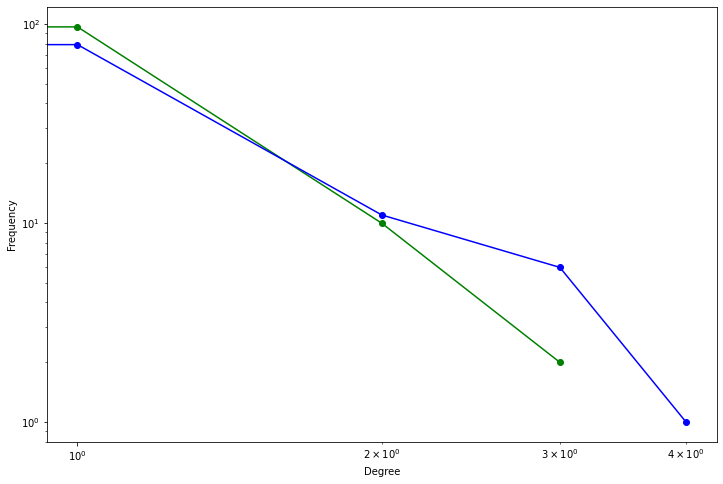

In [9]:
in_degree_freq = degree_histogram_directed(G, in_degree=True)
out_degree_freq = degree_histogram_directed(G, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [10]:
from numpy import linalg as LA
def spectral_modularity_maximization(G):
    m = G.number_of_edges()
    A = nx.adjacency_matrix(G)
    n = G.number_of_nodes()
    K = np.array([val for (node, val) in G.degree()])
    K = K.reshape(n, 1)
    B = A - (np.dot(K, K.transpose())) / (2*m)
    w, v = LA.eigh(B)
    return np.array(np.sign(v[:,-1]))

In [11]:
#largest_component = G.subgraph(max(nx.strongly_connected_components(G), key=len)).copy()
#g = spectral_modularity_maximization(largest_component)


In [12]:
#g_t = np.array(np.transpose(g))
#B = nx.adjacency_matrix(G)
#B = nx.directed_modularity_matrix(largest_component)
#Q = np.dot(np.dot(g_t, B), g) / (4 * G.number_of_edges())
#print(Q)

In [13]:
from sklearn.cluster import KMeans
def MNLSP(G, l):
    L = nx.normalized_laplacian_matrix(G)
    eigs = LA.eigh(L.toarray())
    index = np.argpartition(eigs[0], 1)[1:l]
    n = eigs[1][:,1].shape[0]
    v = []
    for i in index:
        v.append(np.reshape(eigs[1][:,i], (n, 1)))
    v2 = np.concatenate(v, axis = 1)
    kmeans = KMeans(n_clusters=l, random_state=0)
    kmeans.fit(np.real(v2))
    return kmeans.labels_

In [14]:
glob_clustering_c = nx.transitivity(G)
print(glob_clustering_c)

0.04285714285714286


In [15]:
# Average weighted degree of G 
n = G.number_of_nodes()
c = np.mean(list(dict(G.degree(weight='weight')).values()))
print(c)

1.851063829787234


In [16]:
# Average degree of G 
n = G.number_of_nodes()
c = np.mean(list(dict(G.degree()).values()))
print(c)

1.3085106382978724


In [17]:
deg_cen =nx.degree_centrality(G)
print(deg_cen)

{2: 0.0053475935828877, 3: 0.0053475935828877, 5: 0.0053475935828877, 27: 0.0053475935828877, 6: 0.0053475935828877, 28: 0.0160427807486631, 7: 0.0053475935828877, 8: 0.0053475935828877, 9: 0.0053475935828877, 10: 0.0106951871657754, 44: 0.0160427807486631, 13: 0.026737967914438502, 16: 0.0160427807486631, 30: 0.0053475935828877, 88: 0.0106951871657754, 14: 0.0106951871657754, 15: 0.0106951871657754, 79: 0.0053475935828877, 17: 0.0160427807486631, 18: 0.0053475935828877, 21: 0.0053475935828877, 98: 0.0053475935828877, 19: 0.0160427807486631, 20: 0.0053475935828877, 90: 0.0053475935828877, 22: 0.0053475935828877, 23: 0.0106951871657754, 29: 0.0053475935828877, 24: 0.0213903743315508, 40: 0.0053475935828877, 67: 0.0053475935828877, 97: 0.0053475935828877, 243: 0.0053475935828877, 25: 0.0053475935828877, 26: 0.0053475935828877, 31: 0.0053475935828877, 32: 0.0053475935828877, 34: 0.0053475935828877, 163: 0.0106951871657754, 35: 0.0053475935828877, 36: 0.0053475935828877, 38: 0.005347593582

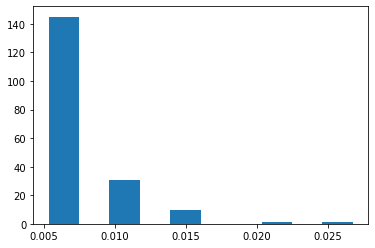

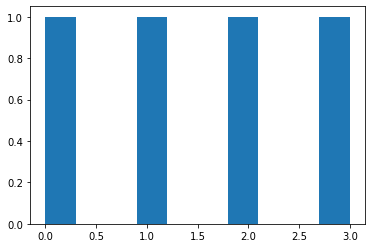

In [18]:
# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(G)

# Plot a histogram of the degree centrality distribution of the graph
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show()



In [19]:
np.size(G.in_degree())

376

In [20]:
np.size(list(nx.degree_centrality(G)))

188

In [21]:
np.size(list(nx.in_degree_centrality(G)))

188

In [22]:
in_deg_centrality = nx.in_degree_centrality(G)

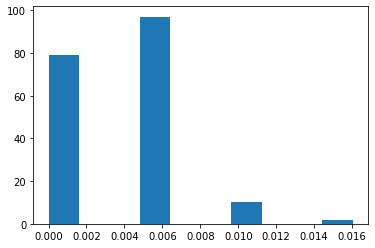

In [23]:
# Plot a histogram of the degree centrality distribution of the graph
plt.figure()
plt.hist(list(in_deg_centrality.values()))
plt.show()

In [24]:
out_deg_centrality = nx.out_degree_centrality(G)

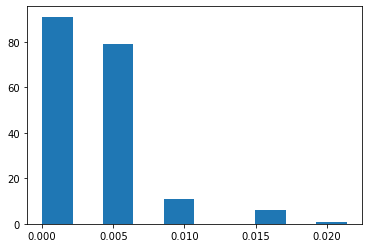

In [25]:
# Plot a histogram of the degree centrality distribution of the graph
plt.figure()
plt.hist(list(out_deg_centrality.values()))
plt.show()

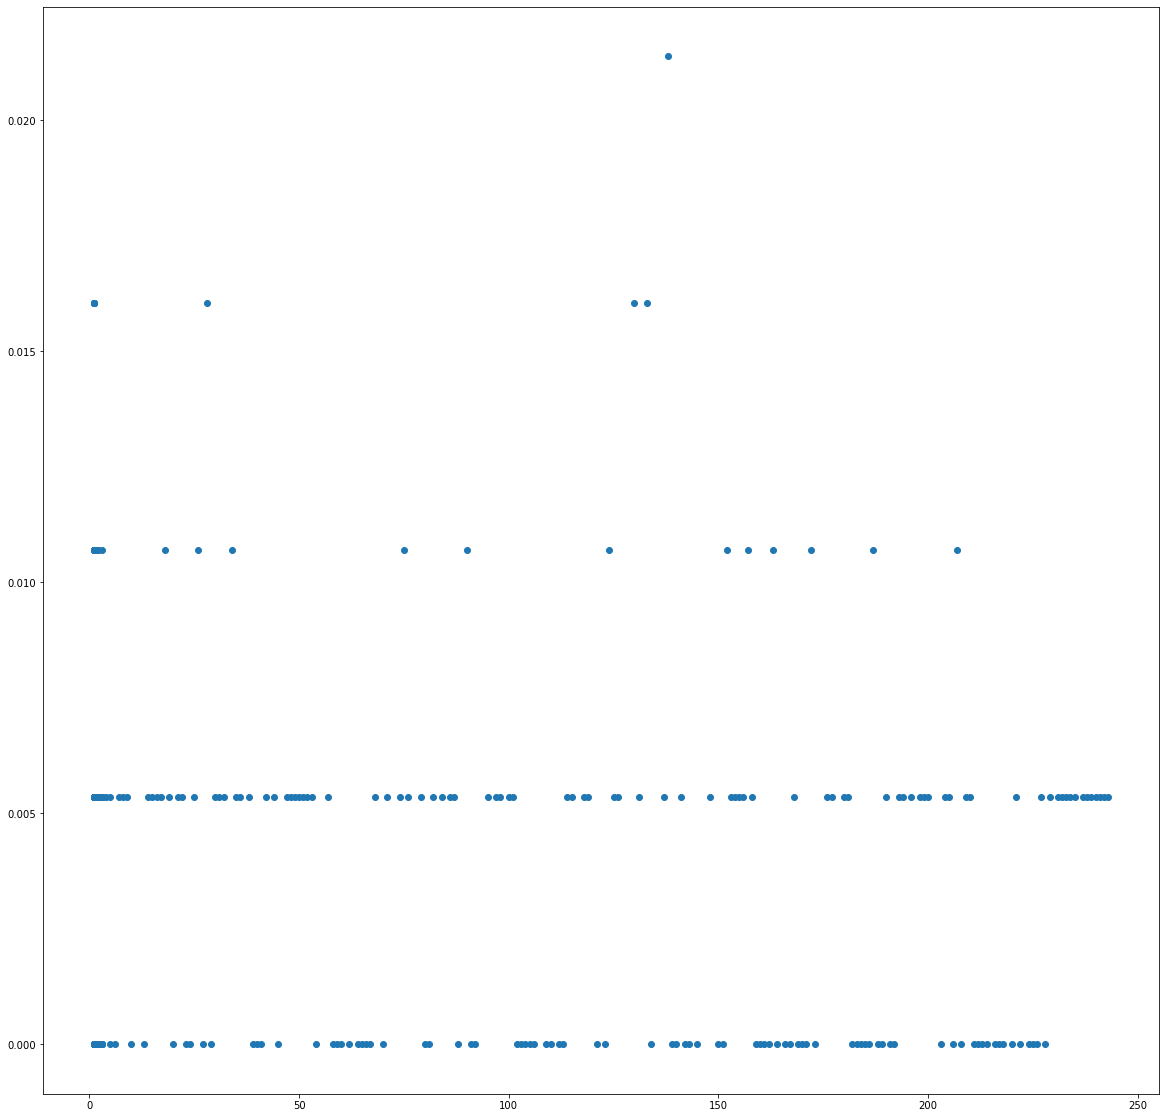

In [26]:
# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure(figsize=(20, 20))
#plt.scatter(G.in_degree(), list(in_deg_centrality) + list(out_deg_centrality))
plt.scatter(G.degree(), list(in_deg_centrality.values()) + list(out_deg_centrality.values()))
plt.show('.')

In [27]:
# close_centrality = nx.closeness_centrality(G)
# print(close_centrality)

In [28]:
pr = nx.pagerank(G, alpha = 0.8)
print(pr)

{2: 0.003379343399288475, 3: 0.006083036673914755, 5: 0.003379343399288475, 27: 0.006083036673914755, 6: 0.003379343399288475, 28: 0.009687961040083128, 7: 0.003379343399288475, 8: 0.006083036673914755, 9: 0.003379343399288475, 10: 0.006083036673914755, 44: 0.013383344381978376, 13: 0.009761719996756815, 16: 0.005982790196825362, 30: 0.005982790196825362, 88: 0.005982790196825362, 14: 0.003379343399288475, 15: 0.0047311900366016155, 79: 0.006570531698022645, 17: 0.003379343399288475, 18: 0.0036797537631358393, 21: 0.0042805744908305686, 98: 0.004881395218525297, 19: 0.003379343399288475, 20: 0.0042805744908305686, 90: 0.0042805744908305686, 22: 0.003379343399288475, 23: 0.006083036673914755, 29: 0.00824621520466422, 24: 0.003379343399288475, 40: 0.0037655852956636577, 67: 0.0037655852956636577, 97: 0.004924310984789206, 243: 0.0037655852956636577, 25: 0.003379343399288475, 26: 0.006083036673914755, 31: 0.003379343399288475, 32: 0.006083036673914755, 34: 0.003379343399288475, 163: 0.008

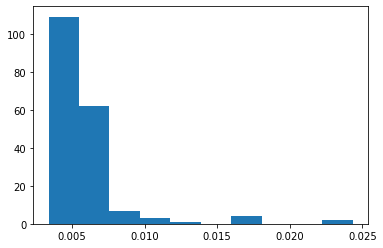

In [29]:
# Plot a histogram of the pagerank centrality distribution of the graph
plt.figure()
plt.hist(list(pr.values()))
plt.show()

In [30]:
eig_cent = nx.eigenvector_centrality(G)

In [31]:
print(eig_cent)

{2: 1.2328391548378674e-18, 3: 5.79434402773798e-17, 5: 1.2328391548378674e-18, 27: 5.79434402773798e-17, 6: 1.2328391548378674e-18, 28: 1.7136464252246347e-16, 7: 1.2328391548378674e-18, 8: 5.79434402773798e-17, 9: 1.2328391548378674e-18, 10: 5.79434402773798e-17, 44: 2.723341693036851e-15, 13: 0.603022663059527, 16: 0.42640141425856215, 30: 0.42640141425856215, 88: 0.42640141425856215, 14: 1.2328391548378674e-18, 15: 5.79434402773798e-17, 79: 0.30151133152976356, 17: 1.2328391548378674e-18, 18: 5.79434402773798e-17, 21: 5.79434402773798e-17, 98: 5.79434402773798e-17, 19: 1.2328391548378674e-18, 20: 5.79434402773798e-17, 90: 5.79434402773798e-17, 22: 1.2328391548378674e-18, 23: 5.79434402773798e-17, 29: 1.3339319655345732e-15, 24: 1.2328391548378674e-18, 40: 5.79434402773798e-17, 67: 5.79434402773798e-17, 97: 5.79434402773798e-17, 243: 5.79434402773798e-17, 25: 1.2328391548378674e-18, 26: 5.79434402773798e-17, 31: 1.2328391548378674e-18, 32: 5.79434402773798e-17, 34: 1.232839154837867

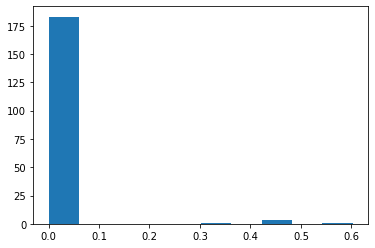

In [32]:
# Plot a histogram of the pagerank centrality distribution of the graph
plt.figure()
plt.hist(list(eig_cent.values()))
plt.show()

In [33]:
r_in_out = nx.degree_assortativity_coefficient(G, x="in", y="out")

In [34]:
print(r_in_out)

0.5116428524920428


In [35]:
print(nx.density(G))

0.0034986915462509958


In [30]:
nx.connected_components(G)

<generator object connected_components at 0x000001C284710040>

In [37]:
#print(nx.diameter(G))

In [38]:
# # Compute the betweenness centrality
# bet_cen = nx.betweenness_centrality(G)
# print(bet_cen)

In [39]:
# import networkx.algorithms.community as nx_comm
# # Compute community structure
# lpc = nx_comm.louvain_communities(G)
# community_index = {n: i for i, com in enumerate(lpc) for n in com}

# #### draw graph ####
# fig, ax = plt.subplots(figsize=(20, 15))
# node_color = [community_index[n] for n in G]
# node_size = [v * 40000 for v in bet_cen.values()]
# nx.draw_networkx(
#     G,
#     with_labels=False,
#     node_color=node_color,
#     node_size=500,
#     alpha=0.8,
# )

# # Title/legend
# font = {"color": "k", "fontweight": "bold", "fontsize": 20}
# ax.set_title("Davis’ Southern Women Club Network", font)
# # Change font color for legend
# font["color"] = "r"

# ax.text(
#     0.50,
#     0.9,
#     "node color = community structure",
#     horizontalalignment="center",
#     transform=ax.transAxes,
#     fontdict=font,
# )
# ax.text(
#     0.50,
#     0.85,
#     "node size = betweeness centrality",
#     horizontalalignment="center",
#     transform=ax.transAxes,
#     fontdict=font,
# )

# # Resize figure for label readibility
# ax.margins(0.1, 0.05)
# fig.tight_layout()
# plt.axis("off")
# plt.show()

In [7]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [189]:
G = nx.convert_node_labels_to_integers(G)

In [190]:
# Adjacency matrix 
A = nx.adjacency_matrix(G)

C:\Users\lichr\AppData\Local\Temp/ipykernel_15924/2707774606.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [191]:
print(G)

Graph with 45813 nodes and 183412 edges


In [192]:
A.shape

(45813, 45813)

In [193]:
adj_G.shape

(188, 188)

In [5]:
edges_list = np.asarray(G.edges)

In [14]:
edges_list

array([[    2,     3],
       [    2,  1043],
       [    2,    79],
       ...,
       [46907, 46908],
       [46915, 46916],
       [46950, 46951]])

In [25]:
# captture nodes in 2 separate lists
from datetime import datetime

node_list_1 = []
node_list_2 = []
for i in edges_list:
    node_list_1.append(i[0])
    node_list_2.append(i[1])

fb_df = pd.DataFrame({'node_1': node_list_1, 'node_2': node_list_2, 'weight':data['weight'], 'time': datetime.fromtimestamp(data['time'])})

In [23]:
fb_df.describe()

,node_1,node_2,weight
count,183412.000000,183412.000000,183412.0
mean,12475.684334,16953.312619,1.0
std,11089.532443,12549.267453,0.0
min,2.000000,3.000000,1.0
25%,3822.000000,6395.750000,1.0
50%,8668.000000,13607.000000,1.0
75%,18458.750000,26299.000000,1.0
max,46950.000000,46952.000000,1.0


In [197]:
# combine all nodes in a list
node_list = node_list_1 + node_list_2
# remove duplicate items from the list
node_list = list(dict.fromkeys(node_list))
adj_G = nx.to_numpy_matrix(G, nodelist = G.nodes)

In [198]:
# # get unconnected node-pairs
# all_unconnected_pairs = []

def nodes_connected(u, v):
    return u in G.neighbors(v)

# # traverse adjacency matrix
# offset = 0
# for i in node_list_1:
#     for j in node_list_2:
#         if i != j:
#             if i in node_list_1 and j in node_list_2:
#                 if (nodes_connected(i, j)):
#                     if nx.shortest_path_length(G, weight = 'weight', source = i, target = j) <=2:
#                         if adj_G[i,j] == 0:
#                             all_unconnected_pairs.append((i, j))
#                 else:
#                     all_unconnected_pairs.append((i, j))
# get unconnected node-pairs
all_unconnected_pairs = []

# traverse adjacency matrix
offset = 0
for i in tqdm(range(adj_G.shape[0])):
    for j in range(offset,adj_G.shape[1]):
        if i != j:
            if (nx.has_path(G, i, j)):
                if nx.shortest_path_length(G, i, j) <=2:
                    if adj_G[i,j] == 0:
                        all_unconnected_pairs.append([i,j])
    offset = offset + 1

  0%|                                                                            | 4/45813 [02:03<393:44:19, 30.94s/it]


KeyboardInterrupt: 

In [199]:
len(all_unconnected_pairs)

1316

In [200]:
node_1_unlinked = [i[0] for i in all_unconnected_pairs]
node_2_unlinked = [i[1] for i in all_unconnected_pairs]

data = pd.DataFrame({'node_1':node_1_unlinked, 
                     'node_2':node_2_unlinked})

# add target variable 'link'
data['link'] = 0

In [201]:
data

,node_1,node_2,link
0,0,48,0
1,0,77,0
2,0,93,0
3,0,100,0
4,0,102,0
...,...,...,...
1311,4,2616,0
1312,4,2709,0
1313,4,2802,0
1314,4,2824,0


In [202]:
fb_df.index.values

array([     0,      1,      2, ..., 183409, 183410, 183411], dtype=int64)

In [203]:
initial_node_count = len(G.nodes)

fb_df_temp = fb_df.copy()

# empty list to store removable links
omissible_links_index = []

for i in tqdm(fb_df.index.values):
  
  # remove a node pair and build a new graph
    G_temp = nx.from_pandas_edgelist(fb_df_temp.drop(index = i), "node_1", "node_2", create_using=nx.Graph())
  
  # check there is no spliting of graph and number of nodes is same
    if (nx.number_connected_components(G_temp) == 1) and (len(G_temp.nodes) == initial_node_count):
        omissible_links_index.append(i)
        fb_df_temp = fb_df_temp.drop(index = i)

  0%|                                                                           | 90/183412 [01:31<51:49:21,  1.02s/it]


KeyboardInterrupt: 

In [204]:
len(omissible_links_index)

0

In [205]:
# create dataframe of removable edges
fb_df_ghost = fb_df.loc[omissible_links_index]

# add the target variable 'link'
fb_df_ghost['link'] = 1
data = []
data = data.append(fb_df_ghost[['node_1', 'node_2', 'link']])

In [180]:
#data['link'].value_counts()

In [206]:
print(data)

None


In [207]:
# drop removable edges
fb_df_partial = fb_df.drop(index=fb_df_ghost.index.values)

# build graph
G_data = nx.from_pandas_edgelist(fb_df_partial, "node_1", "node_2", create_using=nx.Graph())

In [210]:
print(G_data)

Graph with 45813 nodes and 183412 edges


In [208]:
from node2vec import Node2Vec

# Generate walks
node2vec = Node2Vec(G_data, dimensions=100, walk_length=16, num_walks=50)

# train node2vec model
n2w_model = node2vec.fit(window=7, min_count=1)

Computing transition probabilities:   0%|          | 0/45813 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [03:53<00:00,  4.68s/it]


KeyboardInterrupt: 

In [184]:
print(n2w_model)

Word2Vec<vocab=188, vector_size=100, alpha=0.025>


In [ ]:
x = [(n2w_model.wv[i]+n2w_model.wv[j]) for i,j in zip(data['node_1'], data['node_2'])]

In [ ]:
#node_1 = np.asarray(node_list_1).reshape(-1, 1)
#node_2 = np.asarray(node_list_2)
xtrain, xtest, ytrain, ytest = train_test_split(np.array(node_list_1).reshape(-1, 1), np.array(node_list_2),
                                                test_size = 0.3, 
                                                random_state = 35)

In [ ]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()

linearRegression.fit(xtrain, ytrain)

In [ ]:
predictions = lr.predict_proba(xtest)

In [ ]:
predictions

In [ ]:
np.shape(predictions)

In [ ]:
np.shape(ytest)

In [ ]:
roc_auc_score(ytest, predictions[:,1], multi_class = 'ovr')

In [ ]:
import lightgbm as lgbm
train_data = lgbm.Dataset(xtrain, ytrain)
test_data = lgbm.Dataset(xtest, ytest)

# define parameters
parameters = {
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'num_threads' : 2,
    'seed' : 76
}

# train lightGBM model
model = lgbm.train(parameters,
                   train_data,
                   valid_sets=test_data,
                   num_boost_round=1000,
                   early_stopping_rounds=20)